# Capstone_Project_week4

# After-school program

## 1. Introduction

### 1.1 Introduction to the problem and background



Let's say one of my friends (living in Lansing Capital Area, Michigan State) plans to initialize an after-school program for elementary school students and middle-school students. He came to me and asked me for the suggestion on the location of the after-school program.
In order to provide sound advice for him, we should consider the following factors:
 
- number of schools (public and private) in the neighbourhood.
- population in the neighbourhood.
- number of stores and restaurants in the neighbourhood. 

Definitely, the travel cost from the schools to the after-school spot is positively correlated to the distance between them. Moreover, there is a high probability that the more schools around the after-school spot, the more students will enroll the after school program. But one should also check if there already exist other after-school programs in the neighborhood. Besides, the number of stores and restraunts also has a positve impact on the enrollment.


### 1.2 Introduction to the data 

To this end, we should collect the data of public and private schools, as well as the venues in the neighbourhoods. 
Here are the sources of each type of data:

- US zipcode can be found either from https://simplemaps.com/data/us-zips (recommended) or http://federalgovernmentzipcodes.us
  The population correspondign to each zipcode is also provided in the data.

- Geocodes for public schools are availe from https://nces.ed.gov/programs/edge/Geographic/SchoolLocations 

The information of Latitude and Longitude is provided in all the files.

### 1.3 Introduction to the methodology
 
The python packages that we are going to use include (but not limited to):

- requests
- folium
- Nominatim
- pandas
- numpy

as well as foursquare API.

The procedure of preparing the data can be as follows:

- download/read all the datasets from websites. 
- filter out all the schools in the area of interest.
- use Foursquare API to get all the venues (restraunts) in the area. 
- visualize the location of the schools and venues with the folium.Map()
- use the groupby method to find out the number of schools and venues in each neighbourhood, which is defined based on the zipcode.
- find out the population of each neighbourhood.
- order the neighbourhoods based on the number of schools/venues and populations and use this ratio as a guideline 
 

# 2. Data prepation and analysis

## 2.1 import packages

In [326]:
import requests
from pandas.io.json import json_normalize
import pandas as pd 
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim 


## 2.2 preparation of the data

download zipcode file from the website https://simplemaps.com/data/us-zips. 
Here we have already downloaded it into the local directory.

In [327]:
path='uszipsv1.4.csv' 

US_zipcode=pd.read_csv(path) 

US_zipcode.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,county_fips,county_name,all_county_weights,imprecise,military
0,501,40.8133,-73.0476,Holtsville,NY,New York,False,11742.0,NaN,NaN,NaN,NaN,True,False
1,544,40.8133,-73.0476,Holtsville,NY,New York,False,11742.0,NaN,NaN,NaN,NaN,True,False
2,601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,True,NaN,18570.0,72001.0,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False
3,602,18.3607,-67.1752,Aguada,PR,Puerto Rico,True,NaN,41520.0,72003.0,Aguada,{'72003':100},False,False
4,603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,True,NaN,54689.0,72005.0,Aguadilla,{'72005':100},False,False


We are only interested in the data in the Great Lansing Area. Therefore, we define a filter on both State and City names and pick those data out as a new dataframe.

In [346]:
c0 =  US_zipcode['state_name'] =='Michigan'
c1 =  US_zipcode['city'] =='Lansing' 
c2 =  US_zipcode['city'] =='Okemos' 
c3 =  US_zipcode['city'] =='Haslett' 
c4 =  US_zipcode['city'] =='Mason' 
c5 =  US_zipcode['city'] =='Holt'
c6 =  US_zipcode['city'] =='East Lansing'

In [347]:
Great_Lansing = US_zipcode[(c0) & ((c1) | (c2) | (c3) | (c4) | (c5) | (c6))]
Great_Lansing.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,county_fips,county_name,all_county_weights,imprecise,military
20914,48805,42.7082,-84.4144,Okemos,MI,Michigan,False,48864.0,NaN,NaN,NaN,NaN,True,False
20930,48823,42.7620,-84.4539,East Lansing,MI,Michigan,True,NaN,51302.0,26065.0,Ingham,"{'26037':14.5,'26065':85.5}",False,False
20931,48824,42.7229,-84.4751,East Lansing,MI,Michigan,False,48825.0,NaN,NaN,NaN,NaN,False,False
20932,48825,42.7270,-84.4809,East Lansing,MI,Michigan,True,NaN,12596.0,26065.0,Ingham,{'26065':100},False,False
20933,48826,42.7360,-84.4843,East Lansing,MI,Michigan,False,48823.0,NaN,NaN,NaN,NaN,True,False


Taking out the information that we need

In [348]:
columns = ['zip','lat','lng','city','population']
GL_population = Great_Lansing[columns]

In [349]:
GL_population.rename(columns={'zip':'Zipcode','city':'City','lat':'Lat','lng':'Lon','population':'Population'},inplace=True) 
GL_population.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Zipcode,Lat,Lon,City,Population
20914,48805,42.7082,-84.4144,Okemos,NaN
20930,48823,42.7620,-84.4539,East Lansing,51302.0
20931,48824,42.7229,-84.4751,East Lansing,NaN
20932,48825,42.7270,-84.4809,East Lansing,12596.0
20933,48826,42.7360,-84.4843,East Lansing,NaN


In [352]:
print("There are {} neighbourhoods in the Great Lansing Area with {} different Latitudes.".format(len(GL_population['Zipcode']),
                                                                                                  len(GL_population['Lat'].unique())))

There are 31 neighbourhoods in the Great Lansing Area with 20 different Latitudes.


Now let's prepare the data for schools:

- public schools
- private schools

We have already downloaded them into the local directory.

### public schools

In [355]:
public_path='EDGE_GEOCODE_PUBLICSCH_1617/EDGE_GEOCODE_PUBLICSCH_1617.xlsx'
Public_Schools = pd.read_excel(public_path)

Again, we define filters to pick out the data that we are interested.

In [356]:
c0 = Public_Schools['STATE'] == 'MI'
c1 = Public_Schools['CITY'] =='LANSING'
c2 = Public_Schools['CITY'] =='OKEMOS'
c3 = Public_Schools['CITY'] =='HASLETT'
c4 = Public_Schools['CITY'] =='EAST LANSING'
c5 = Public_Schools['CITY'] =='MASON'
c6 = Public_Schools['CITY'] =='HOLT'

GL_pub_schools = Public_Schools[(c0) & ((c1) | (c2) | (c3) | (c4) | (c5) | (c6))]
GL_pub_schools.head()

,NCESSCH,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SURVYEAR
43329,260007900543,Cole Academy,26,1915 WEST MOUNT HOPE AVE,LANSING,MI,48910,26,26065,Ingham County,...,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,26068,26023,2016
43330,260008000544,El-Hajj Malik El-Shabazz Academy,26,1028 WEST BARNES AVE,LANSING,MI,48910,26,26065,Ingham County,...,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,26068,26023,2016
43331,260008200546,Mid-Michigan Leadership Academy,26,730 WEST MAPLE ST,LANSING,MI,48906,26,26065,Ingham County,...,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,26068,26023,2016
43419,260020301114,Windemere Park Charter Academy,26,3100 WEST SAGINAW ST,LANSING,MI,48917,26,26065,Ingham County,...,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,26068,26023,2016
43565,260095908074,Lansing Charter Academy,26,3300 EXPRESS CT,LANSING,MI,48910,26,26065,Ingham County,...,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,26068,26023,2016


In [361]:
GL_pub_schools.columns

Index(['NCESSCH', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE', 'ZIP',
       'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA', 'NMCBSA',
       'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL', 'SLDU',
       'SURVYEAR'],
      dtype='object')

In [367]:
columns = ['NAME','CITY','ZIP','LAT','LON']
GL_pubs = GL_pub_schools[columns]
GL_pubs.rename(columns={'NAME':'Name','CITY':'City','ZIP':'Zipcode','LAT':'Lat','LON':'Lon'},inplace=True)
GL_pubs.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Name,City,Zipcode,Lat,Lon
43329,Cole Academy,LANSING,48910,42.711623,-84.578810
43330,El-Hajj Malik El-Shabazz Academy,LANSING,48910,42.715258,-84.566713
43331,Mid-Michigan Leadership Academy,LANSING,48906,42.746410,-84.563371
43419,Windemere Park Charter Academy,LANSING,48917,42.741789,-84.591616
43565,Lansing Charter Academy,LANSING,48910,42.699119,-84.575243


In [368]:
print("There are {} public schools in the Great Lansing Area with {} different neighbourhoods.".format(len(GL_pubs['Name']),
                                                                                                  len(GL_pubs['Zipcode'].unique())))

There are 69 public schools in the Great Lansing Area with 11 different neighbourhoods.


### Private Schools

In [358]:
private_schools = pd.read_excel('EDGE_GEOCODE_PRIVATESCH_15_16/EDGE_GEOCODE_PRIVATESCH_1516.xlsx')
private_schools.head()

,PPIN,PINST,PL_ADD,PL_CIT,PL_STABB,PL_ZIP,PL_ZIP4,STFIP15,CNTY15,NMCNTY15,...,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15
0,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE ROAD,PRATTVILLE,AL,36067,2713,1,1001,Autauga County,...,33860,"Montgomery, AL",1,N,N,N,N,102,88,30
1,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,3023,1,1001,Autauga County,...,33860,"Montgomery, AL",1,N,N,N,N,102,88,30
2,00002722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,9702,1,1001,Autauga County,...,33860,"Montgomery, AL",1,N,N,N,N,102,42,30
3,K9300030,FIRST BAPTIST KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,AL,36067,NaN,1,1001,Autauga County,...,33860,"Montgomery, AL",1,N,N,N,N,102,88,30
4,00002176,MARIETTA JOHNSON SCHOOL OF ORGANIC EDUCATION,8 MARIETTA DR,FAIRHOPE,AL,36532,1653,1,1003,Baldwin County,...,19300,"Daphne-Fairhope-Foley, AL",1,380,"Mobile-Daphne-Fairhope, AL",N,N,101,94,32


In [369]:
c0 = private_schools['PL_STABB'] =='MI'
c1 = private_schools['PL_CIT'] =='LANSING'
c2 = private_schools['PL_CIT'] =='OKEMOS'
c3 = private_schools['PL_CIT'] =='HASLETT'
c4 = private_schools['PL_CIT'] =='EAST LANSING'
c5 = private_schools['PL_CIT'] =='HOLT'
c6 = private_schools['PL_CIT'] =='MASON'
 
GL_private_schools = private_schools[(c0) & ((c1) | (c2) | (c3) | (c4) | (c5) | (c6))]
GL_private_schools.head()

,PPIN,PINST,PL_ADD,PL_CIT,PL_STABB,PL_ZIP,PL_ZIP4,STFIP15,CNTY15,NMCNTY15,...,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15
10007,A1502011,GREATER LANSING ADVENTIST SCHOOL,5330 W ST JOE HWY,LANSING,MI,48917,4060,26,26045,Eaton County,...,29620,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2607,71,24
10009,00642751,OUR SAVIOR LUTHERAN SCHOOL,7910 E ST JOE HWY,LANSING,MI,48917,8871,26,26045,Eaton County,...,29620,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2607,71,24
10013,00640197,ST GERARD ELEMENTARY SCHOOL,4433 W WILLOW HWY,LANSING,MI,48917,NaN,26,26045,Eaton County,...,29620,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2607,71,24
10067,01610864,CAPITOL CITY BAPTIST SCHOOL,5100 WILLOUGHBY RD,HOLT,MI,48842,1098,26,26065,Ingham County,...,29620,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,67,23
10068,02037083,MONTESSORI CHILDRENS HOUSE,2100 W SAINT JOSEPH ST,LANSING,MI,48915,1175,26,26065,Ingham County,...,29620,"Lansing-East Lansing, MI",1,330,"Lansing-East Lansing-Owosso, MI",N,N,2608,68,23


In [371]:
#Private_Schools_MI_GL.rename(columns={'PL_ZIP':'ZIP','PL_CIT':'CITY'},inplace=True)
GL_private_schools.columns

Index(['PPIN', 'PINST', 'PL_ADD', 'PL_CIT', 'PL_STABB', 'PL_ZIP', 'PL_ZIP4',
       'STFIP15', 'CNTY15', 'NMCNTY15', 'LOCALE15', 'LAT1516', 'LON1516',
       'CBSA15', 'NMCBSA15', 'CBSATYPE15', 'CSA15', 'NMCSA15', 'NECTA15',
       'NMNECTA15', 'CD15', 'SLDL15', 'SLDU15'],
      dtype='object')

In [372]:
columns = ['PINST','PL_CIT','PL_ZIP','LAT1516','LON1516']
GL_privates = GL_private_schools[columns]
GL_privates.rename(columns={'PINST':'Name','PL_CIT':'City','PL_ZIP':'Zipcode','LAT1516':'Lat','LON1516':'Lon'},inplace=True)
GL_privates.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Name,City,Zipcode,Lat,Lon
10007,GREATER LANSING ADVENTIST SCHOOL,LANSING,48917,42.726619,-84.624478
10009,OUR SAVIOR LUTHERAN SCHOOL,LANSING,48917,42.725150,-84.684151
10013,ST GERARD ELEMENTARY SCHOOL,LANSING,48917,42.747481,-84.611369
10067,CAPITOL CITY BAPTIST SCHOOL,HOLT,48842,42.653130,-84.550171
10068,MONTESSORI CHILDRENS HOUSE,LANSING,48915,42.727000,-84.580061


In [373]:
print("There are {} private schools in the Great Lansing Area with {} different neighbourhoods.".format(len(GL_privates['Name']),
                                                                                                  len(GL_privates['Zipcode'].unique())))

There are 15 private schools in the Great Lansing Area with 7 different neighbourhoods.


## A short summary

We have prepared three datasets for use
- **GL_population** for populations
- **GL_pubs**  for public schools
- **GL_privates** for private schools 

# Foursquare API

Next, we use the foursquare API to get venues for the area.

In [374]:
CLIENT_ID = 'L0RMBCMNYHTS4DGW4DE2G0WWVXX5SNG1U4T1R4BTXG0Z0WJ5' # your Foursquare ID
CLIENT_SECRET = '3NTSNQHDWPVKUDFHTLAA4FERGL0CBNOHCMIWEYTWFZG5UJFQ' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 100
radius = 5000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L0RMBCMNYHTS4DGW4DE2G0WWVXX5SNG1U4T1R4BTXG0Z0WJ5
CLIENT_SECRET:3NTSNQHDWPVKUDFHTLAA4FERGL0CBNOHCMIWEYTWFZG5UJFQ


In [375]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [376]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    count_name = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        count_name += 1
        print(count_name,'zipcode/neighbourhood:', name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [378]:
df = GL_population
Great_Lansing_venues = getNearbyVenues(names=df['Zipcode'],
                                   latitudes=df['Lat'],
                                   longitudes=df['Lon']
                                  )

1 zipcode/neighbourhood: 48805
2 zipcode/neighbourhood: 48823
3 zipcode/neighbourhood: 48824
4 zipcode/neighbourhood: 48825
5 zipcode/neighbourhood: 48826
6 zipcode/neighbourhood: 48840
7 zipcode/neighbourhood: 48842
8 zipcode/neighbourhood: 48854
9 zipcode/neighbourhood: 48864
10 zipcode/neighbourhood: 48901
11 zipcode/neighbourhood: 48906
12 zipcode/neighbourhood: 48908
13 zipcode/neighbourhood: 48909
14 zipcode/neighbourhood: 48910
15 zipcode/neighbourhood: 48911
16 zipcode/neighbourhood: 48912
17 zipcode/neighbourhood: 48913
18 zipcode/neighbourhood: 48915
19 zipcode/neighbourhood: 48916
20 zipcode/neighbourhood: 48917
21 zipcode/neighbourhood: 48918
22 zipcode/neighbourhood: 48919
23 zipcode/neighbourhood: 48922
24 zipcode/neighbourhood: 48924
25 zipcode/neighbourhood: 48929
26 zipcode/neighbourhood: 48930
27 zipcode/neighbourhood: 48933
28 zipcode/neighbourhood: 48937
29 zipcode/neighbourhood: 48951
30 zipcode/neighbourhood: 48956
31 zipcode/neighbourhood: 48980


In [411]:
print(Great_Lansing_venues.shape)

Great_Lansing_venues.head(10)

(255, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,48805,42.7082,-84.4144,Tacoma Hills Natural Area,42.707812,-84.414238,Trail
1,48805,42.7082,-84.4144,XFINITY Store by Comcast,42.705680,-84.416729,Business Service
2,48805,42.7082,-84.4144,Golden Eagle Nature Trail,42.710777,-84.410447,Trail
3,48805,42.7082,-84.4144,Platinum Paint Coatings LLC Okemos,42.706187,-84.419868,Home Service
4,48823,42.7620,-84.4539,Walnut Hills Golf Club,42.759651,-84.454663,Golf Course
5,48824,42.7229,-84.4751,MSU Horticulture Gardens,42.721251,-84.473551,Garden
6,48824,42.7229,-84.4751,MSU Dairy Store,42.724393,-84.478446,Ice Cream Shop
7,48824,42.7229,-84.4751,Wharton Center for Performing Arts,42.724205,-84.471024,Theater
8,48824,42.7229,-84.4751,Abrams Planetarium,42.725554,-84.476291,Planetarium
9,48824,42.7229,-84.4751,Michigan 4-H Children's Garden,42.720839,-84.472827,Garden


In [412]:
columns=['Neighborhood','Venue','Venue Latitude','Venue Longitude','Venue Category']
GL_venues_short = Great_Lansing_venues[columns]

In [413]:
GL_venues_short.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,48805,Tacoma Hills Natural Area,42.707812,-84.414238,Trail
1,48805,XFINITY Store by Comcast,42.705680,-84.416729,Business Service
2,48805,Golden Eagle Nature Trail,42.710777,-84.410447,Trail
3,48805,Platinum Paint Coatings LLC Okemos,42.706187,-84.419868,Home Service
4,48823,Walnut Hills Golf Club,42.759651,-84.454663,Golf Course


In [421]:
GL_venues=GL_venues_short.rename(columns={'Neighborhood':'Zipcode'})

In [422]:
GL_venues.head()

,Zipcode,Venue,Venue Latitude,Venue Longitude,Venue Category
0,48805,Tacoma Hills Natural Area,42.707812,-84.414238,Trail
1,48805,XFINITY Store by Comcast,42.705680,-84.416729,Business Service
2,48805,Golden Eagle Nature Trail,42.710777,-84.410447,Trail
3,48805,Platinum Paint Coatings LLC Okemos,42.706187,-84.419868,Home Service
4,48823,Walnut Hills Golf Club,42.759651,-84.454663,Golf Course


## Visualization of the location of neighbourhoods, schools and venues

In [424]:
def get_latlon(address):
    geolocator = Nominatim()
    location   = geolocator.geocode(address)
    latitude   = location.latitude
    longitude  = location.longitude
    return latitude, longitude

In [425]:
latitude, longitude = get_latlon("Lansing, MI")
latitude, longitude

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


(42.7404617, -84.5468496)

In [429]:

map_Great_Lansing = folium.Map(location=[latitude, longitude], zoom_start=12)

# population
for lat, lng, zipcode, population in zip(GL_population['Lat'], GL_population['Lon'], 
                                         GL_population['Zipcode'], GL_population['Population']): 
    labels = 'Zipcode:{}, Population: {}'.format(zipcode,population)
    label = folium.Popup(labels,parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        popup=label,
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Great_Lansing)  
    
map_Great_Lansing

# add markers to map
# public schools
for lat, lng, name in zip(GL_pubs['Lat'], GL_pubs['Lon'], GL_pubs['Name']): 
    labels = '{}'.format(name)
    label = folium.Popup(labels, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='green',
        popup=label,
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Great_Lansing)  
    # private schools
for lat, lng, name in zip(GL_privates['Lat'], GL_privates['Lon'], GL_privates['Name']): 
    labels = '{}'.format(name)
    label = folium.Popup(labels, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='yellow',
        popup=label,
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Great_Lansing)  

    #Neighborhood Latitude	Neighborhood Longitude	Venue	Venue Latitude	Venue Longitude	Venue Category
for lat, lng, name in zip(GL_venues['Venue Latitude'], 
                          GL_venues['Venue Longitude'], 
                          GL_venues['Venue']): 
    labels = '{}'.format(name)
    label = folium.Popup(labels, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='red',
        popup=label,
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Great_Lansing) 
    
     
    
map_Great_Lansing

## Fig1: distribution of public schools (green), private schools (yellow), venues (red) and neighbourhoods (blue) in Great Lansing Area.

# Visualization of statistic data

In [432]:
print(GL_pubs.shape, GL_privates.shape)

(69, 5) (15, 5)


In [430]:
GL_all_schools = pd.concat([GL_pubs,GL_privates],axis=0,join='outer')
GL_all_schools.shape

(84, 5)

In [439]:
GL_all_schools_summary=pd.DataFrame(GL_all_schools.groupby('Zipcode').count().sort_values(by='Name',ascending=False))
GL_all_schools_summary.rename(columns={'Name':'School Name'},inplace=True)
GL_all_schools_summary

,School Name,City,Lat,Lon
Zipcode,,,,
48910,12,12,12,12
48842,10,10,10,10
48854,8,8,8,8
48917,8,8,8,8
48823,7,7,7,7
48864,7,7,7,7
48840,5,5,5,5
48910,3,3,3,3
48823,3,3,3,3


In [437]:
GL_venues.head()

,Zipcode,Venue,Venue Latitude,Venue Longitude,Venue Category
0,48805,Tacoma Hills Natural Area,42.707812,-84.414238,Trail
1,48805,XFINITY Store by Comcast,42.705680,-84.416729,Business Service
2,48805,Golden Eagle Nature Trail,42.710777,-84.410447,Trail
3,48805,Platinum Paint Coatings LLC Okemos,42.706187,-84.419868,Home Service
4,48823,Walnut Hills Golf Club,42.759651,-84.454663,Golf Course


In [438]:
GL_venues_summary = pd.DataFrame(GL_venues.groupby('Zipcode').count().sort_values(by='Venue',ascending=False))
GL_venues_summary

,Venue,Venue Latitude,Venue Longitude,Venue Category
Zipcode,,,,
48933,47,47,47,47
48826,46,46,46,46
48909,45,45,45,45
48825,14,14,14,14
48854,12,12,12,12
48917,9,9,9,9
48824,8,8,8,8
48915,6,6,6,6
48924,4,4,4,4


In [447]:
GL_population.set_index('Zipcode',inplace=True)

KeyError: 'Zipcode'

In [448]:
GL_population

,Lat,Lon,City,Population
Zipcode,,,,
48805,42.7082,-84.4144,Okemos,NaN
48823,42.7620,-84.4539,East Lansing,51302.0
48824,42.7229,-84.4751,East Lansing,NaN
48825,42.7270,-84.4809,East Lansing,12596.0
48826,42.7360,-84.4843,East Lansing,NaN
48840,42.7690,-84.3707,Haslett,12501.0
48842,42.6338,-84.5387,Holt,20432.0
48854,42.5820,-84.4517,Mason,18598.0
48864,42.7013,-84.4067,Okemos,20148.0


In [446]:
GL_all = pd.concat([GL_all_schools_summary,GL_venues_summary],axis=1,join='outer')

columns=['School Name','Venue']
GL_all_need = GL_all[columns]
GL_all_need.head()

,School Name,Venue
Zipcode,,
48910,12.0,2.0
48842,10.0,1.0
48854,8.0,12.0
48917,8.0,9.0
48823,7.0,1.0


In [450]:
GL_all_need_short = pd.concat([GL_all_need,GL_population],axis=1,join='outer')

,School Name,Venue,Lat,Lon,City,Population
Zipcode,,,,,,
48910,12.0,2.0,42.6985,-84.5230,Lansing,34560.0
48842,10.0,1.0,42.6338,-84.5387,Holt,20432.0
48854,8.0,12.0,42.5820,-84.4517,Mason,18598.0
48917,8.0,9.0,42.7238,-84.6400,Lansing,32062.0
48823,7.0,1.0,42.7620,-84.4539,East Lansing,51302.0
48864,7.0,1.0,42.7013,-84.4067,Okemos,20148.0
48840,5.0,1.0,42.7690,-84.3707,Haslett,12501.0
48910,3.0,NaN,NaN,NaN,NaN,NaN
48823,3.0,NaN,NaN,NaN,NaN,NaN


In [452]:
GL_all_need_short.fillna(GL_all_need_short.mean(), inplace=True)

GL_all_need_short.dropna(axis=0,inplace=True)
GL_all_need_short

,School Name,Venue,Lat,Lon,City,Population
Zipcode,,,,,,
48910,12.000000,2.0,42.6985,-84.5230,Lansing,34560.000000
48842,10.000000,1.0,42.6338,-84.5387,Holt,20432.000000
48854,8.000000,12.0,42.5820,-84.4517,Mason,18598.000000
48917,8.000000,9.0,42.7238,-84.6400,Lansing,32062.000000
48823,7.000000,1.0,42.7620,-84.4539,East Lansing,51302.000000
48864,7.000000,1.0,42.7013,-84.4067,Okemos,20148.000000
48840,5.000000,1.0,42.7690,-84.3707,Haslett,12501.000000
48915,3.000000,6.0,42.7383,-84.5710,Lansing,9218.000000
48912,3.000000,4.0,42.7402,-84.5235,Lansing,17035.000000


In [461]:
GL_final=GL_all_need_short.sort_values(by=['School Name','Population','Venue'],ascending=False)

In [466]:
GL_final.reset_index(inplace=True)

In [467]:
GL_final

,Zipcode,School Name,Venue,Lat,Lon,City,Population
0,48910,12.000000,2.0,42.6985,-84.5230,Lansing,34560.000000
1,48842,10.000000,1.0,42.6338,-84.5387,Holt,20432.000000
2,48917,8.000000,9.0,42.7238,-84.6400,Lansing,32062.000000
3,48854,8.000000,12.0,42.5820,-84.4517,Mason,18598.000000
4,48823,7.000000,1.0,42.7620,-84.4539,East Lansing,51302.000000
5,48864,7.000000,1.0,42.7013,-84.4067,Okemos,20148.000000
6,48840,5.000000,1.0,42.7690,-84.3707,Haslett,12501.000000
7,48826,4.666667,46.0,42.7360,-84.4843,East Lansing,22902.076923
8,48909,4.666667,45.0,42.7311,-84.5526,Lansing,22902.076923
9,48918,4.666667,8.5,40.2439,-87.1261,Lansing,22902.076923


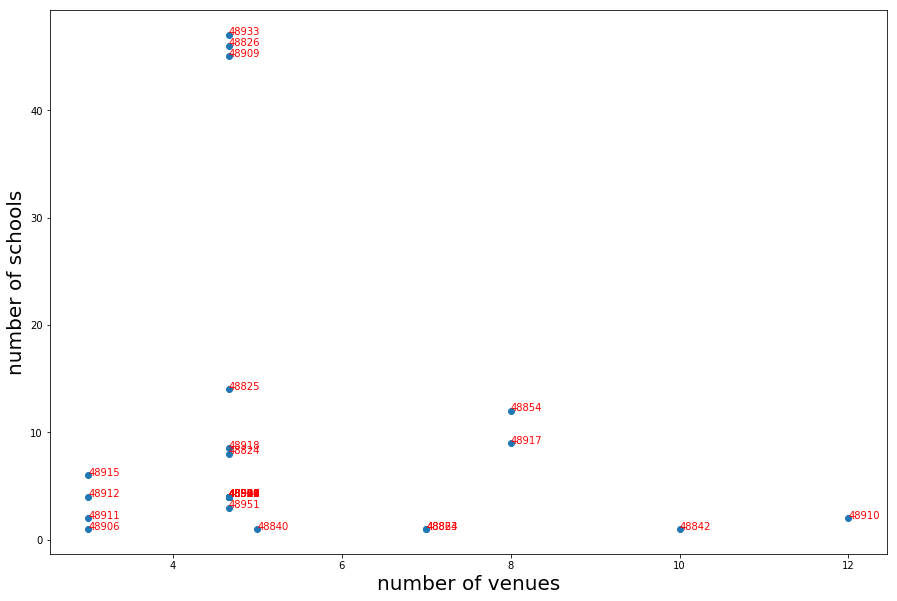

In [492]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=GL_final['School Name'],y=GL_final['Venue'])
plt.ylabel('number of schools',fontsize=20)
plt.xlabel('number of venues',fontsize=20)
for i, txt in enumerate(GL_final['Zipcode']):
    ax.annotate(txt, (GL_final['School Name'][i],GL_final['Venue'][i]),color='red')

## Fig2. distribution of each neighbourhood as a function of the number of schools and the number of venues in the neighbourhood.

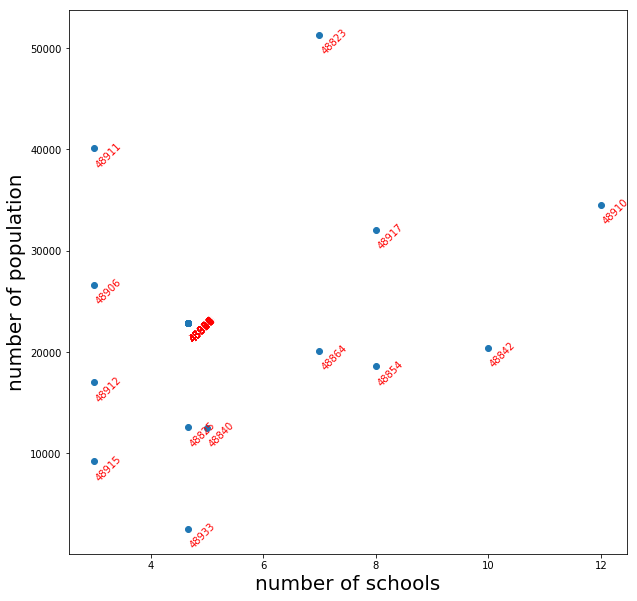

In [491]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=GL_final['School Name'],y=GL_final['Population'])
plt.ylabel('number of population',fontsize=20)
plt.xlabel('number of schools',fontsize=20)
for i, txt in enumerate(GL_final['Zipcode']):
    ax.annotate(txt, (GL_final['School Name'][i],GL_final['Population'][i]),rotation=45,color='red')

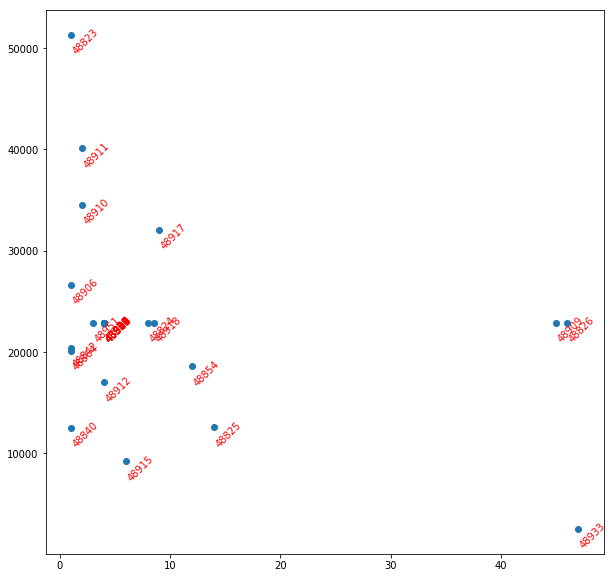

In [493]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=GL_final['Venue'],y=GL_final['Population'])
for i, txt in enumerate(GL_final['Zipcode']):
    ax.annotate(txt, (GL_final['Venue'][i],GL_final['Population'][i]),rotation=45,color='red')

[Text(0,0,'48805'),
 Text(0,0,'48823'),
 Text(0,0,'48824'),
 Text(0,0,'48825'),
 Text(0,0,'48826'),
 Text(0,0,'48840'),
 Text(0,0,'48842'),
 Text(0,0,'48854'),
 Text(0,0,'48864'),
 Text(0,0,'48901'),
 Text(0,0,'48906'),
 Text(0,0,'48908'),
 Text(0,0,'48909'),
 Text(0,0,'48910'),
 Text(0,0,'48911'),
 Text(0,0,'48912'),
 Text(0,0,'48913'),
 Text(0,0,'48915'),
 Text(0,0,'48916'),
 Text(0,0,'48917'),
 Text(0,0,'48918'),
 Text(0,0,'48919'),
 Text(0,0,'48922'),
 Text(0,0,'48924'),
 Text(0,0,'48929'),
 Text(0,0,'48930'),
 Text(0,0,'48933'),
 Text(0,0,'48937'),
 Text(0,0,'48951'),
 Text(0,0,'48956'),
 Text(0,0,'48980')]

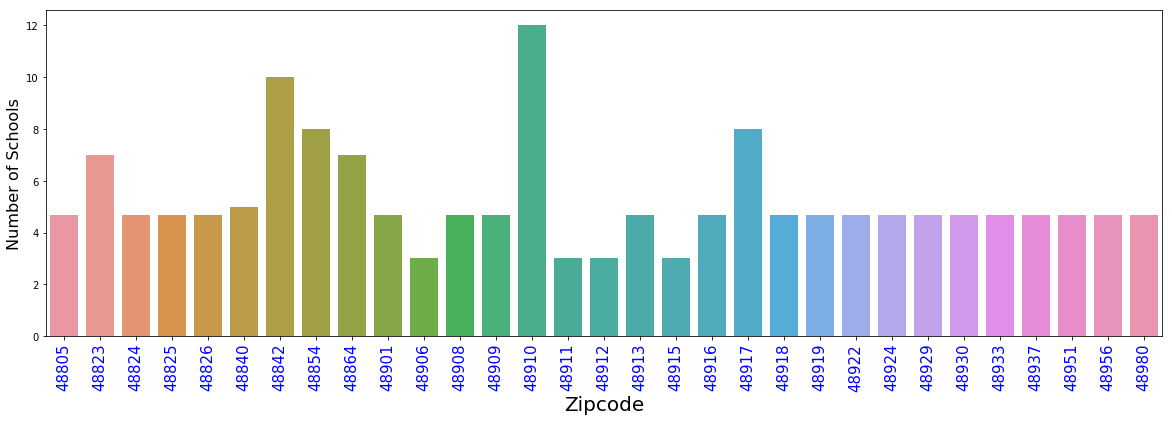

In [495]:
plt.figure(figsize=(20,6))
fig=sns.barplot(x=GL_final['Zipcode'],y=GL_final['School Name'])
plt.xlabel("Zipcode",fontsize=20)
plt.ylabel("Number of Schools",fontsize=16)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90,color='blue',size=15)   

# Discussion

## 